In [1]:
from matplotlib import pyplot as plt
from importlib import reload
from utils import *

C:\Users\Alekseyl\Envs\absa\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from jupyterthemes import jtplot
# jtplot.style()  # development
jtplot.reset()  # production

In [3]:
w2v = load_w2v()

Loading real w2v...
Done


In [4]:
import acd
reload(acd)
acd_ = acd.ACD(w2v)

Loading tokenizer...


In [5]:
# ds = load_dataset('data/laptops_train.xml')
ds = load_dataset(r'data/restaurants_train.xml')
fdist = category_fdist(ds)
x_train, y_train = get_acd_ds(ds, fdist, acd_.get_acd_features)

In [6]:
x_train_hand = pickle.load(
    open(r'data/hand/acd/acd-rest-train.pickle', 'rb'), encoding='latin1')
y_train_hand = y_train
x_train_hand.shape

(1708, 660)

Running SVM (linear)...
            C   Mean F1
0    1.000000  0.822418
1    1.473684  0.822295
2    1.947368  0.820764
3    2.421053  0.820101
4    2.894737  0.817802
5    3.368421  0.817447
6    3.842105  0.815946
7    4.315789  0.814778
8    4.789474  0.814804
9    5.263158  0.813432
10   5.736842  0.813474
11   6.210526  0.811710
12   6.684211  0.811349
13   7.157895  0.811333
14   7.631579  0.809580
15   8.105263  0.808769
16   8.578947  0.808405
17   9.052632  0.808107
18   9.526316  0.807101
19  10.000000  0.806038
Running SVM (rbf)...
            C   Mean F1
0    1.000000  0.806445
1    1.473684  0.807441
2    1.947368  0.807608
3    2.421053  0.809038
4    2.894737  0.811078
5    3.368421  0.811633
6    3.842105  0.814269
7    4.315789  0.815333
8    4.789474  0.814592
9    5.263158  0.815418
10   5.736842  0.815623
11   6.210526  0.816449
12   6.684211  0.817148
13   7.157895  0.816281
14   7.631579  0.815910
15   8.105263  0.815897
16   8.578947  0.816167
17   9.052632  0.81

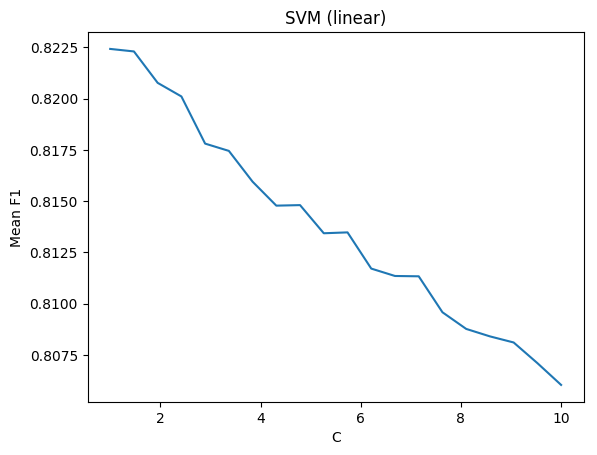

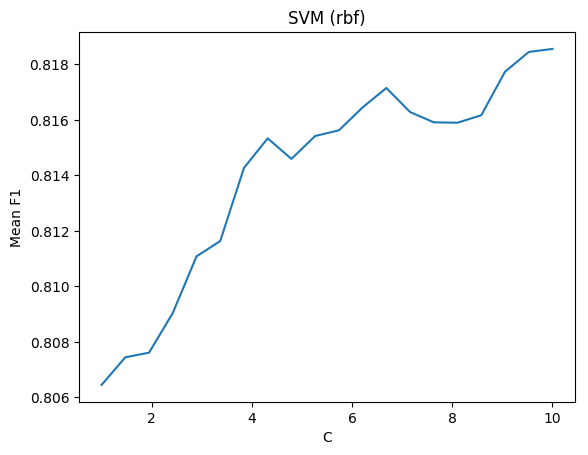

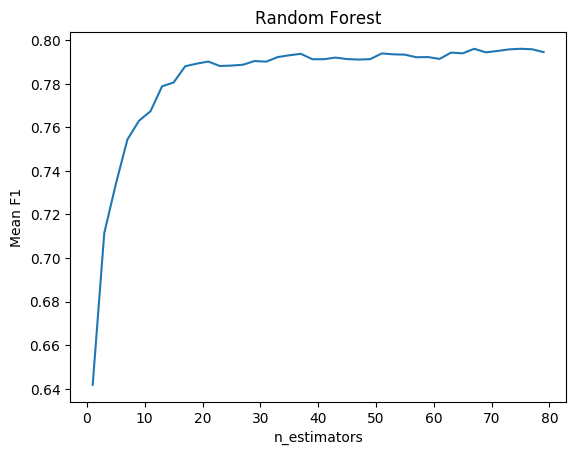

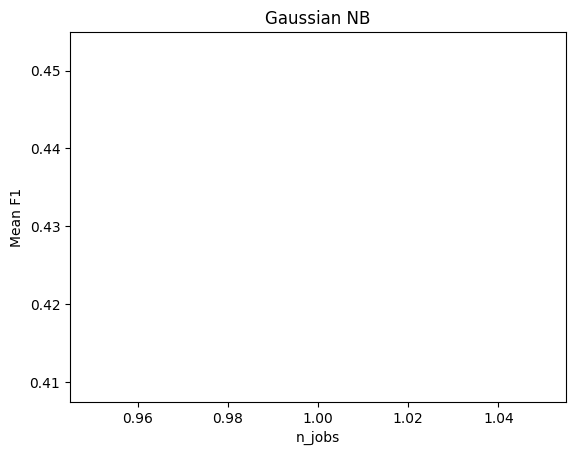

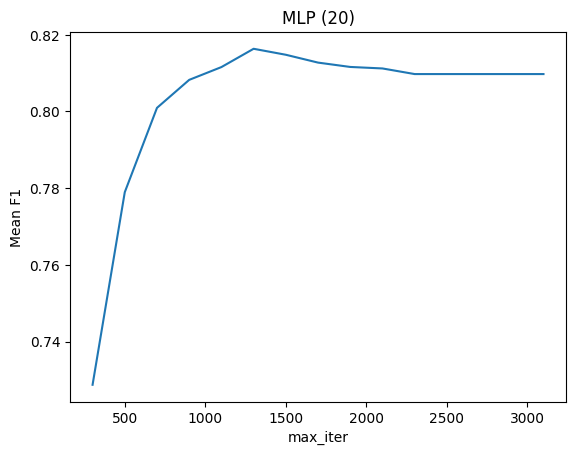

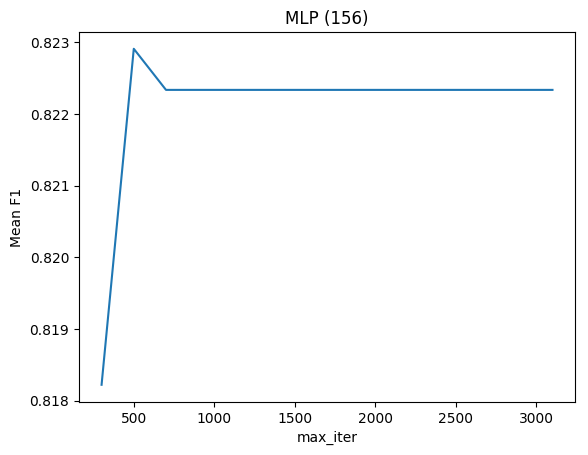

In [7]:
acd_.grid_search_acd(x_train_hand, y_train)

Running SVM (linear)...
            C   Mean F1
0    1.000000  0.737774
1    1.473684  0.735498
2    1.947368  0.733745
3    2.421053  0.734035
4    2.894737  0.732269
5    3.368421  0.731396
6    3.842105  0.730547
7    4.315789  0.729789
8    4.789474  0.728465
9    5.263158  0.728397
10   5.736842  0.726039
11   6.210526  0.723972
12   6.684211  0.722383
13   7.157895  0.720596
14   7.631579  0.721397
15   8.105263  0.720111
16   8.578947  0.719535
17   9.052632  0.718324
18   9.526316  0.717736
19  10.000000  0.716262
Running SVM (rbf)...
            C   Mean F1
0    1.000000  0.717571
1    1.473684  0.717476
2    1.947368  0.717444
3    2.421053  0.717577
4    2.894737  0.717596
5    3.368421  0.716915
6    3.842105  0.718125
7    4.315789  0.720187
8    4.789474  0.721061
9    5.263158  0.721405
10   5.736842  0.723204
11   6.210526  0.722544
12   6.684211  0.722215
13   7.157895  0.721993
14   7.631579  0.724202
15   8.105263  0.724311
16   8.578947  0.723814
17   9.052632  0.72

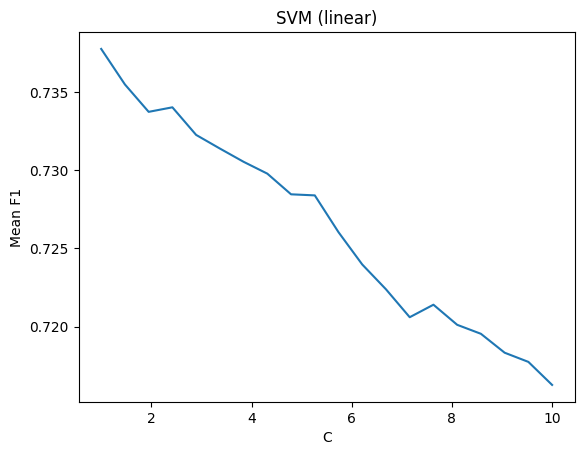

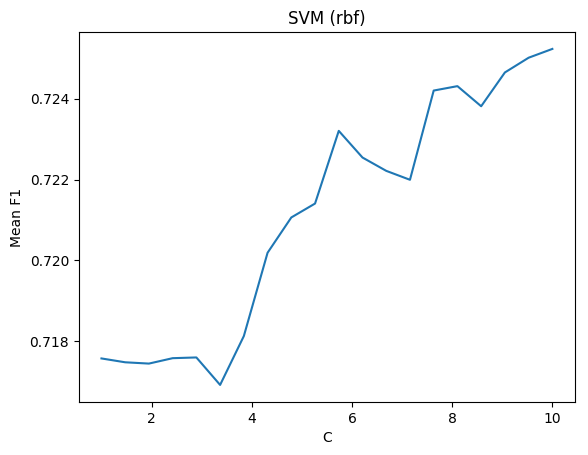

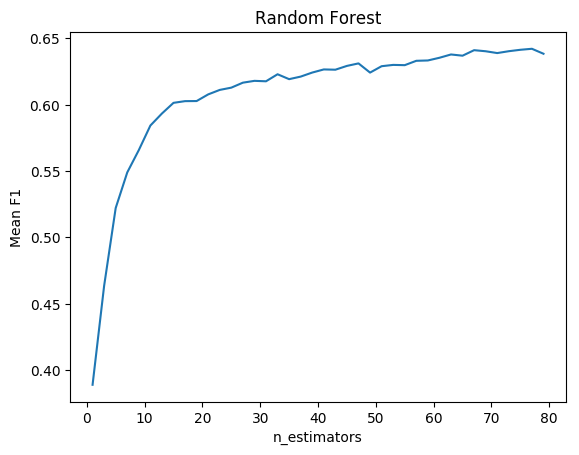

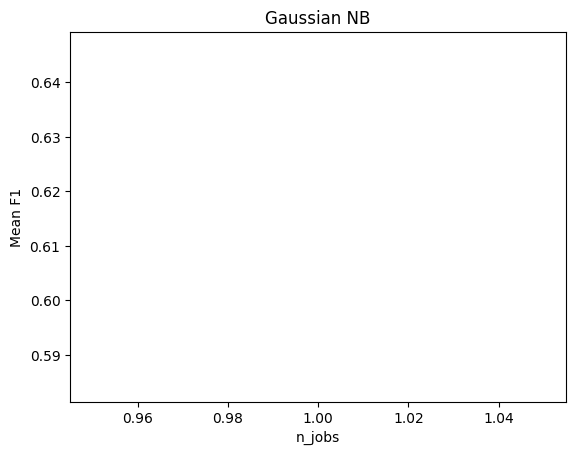

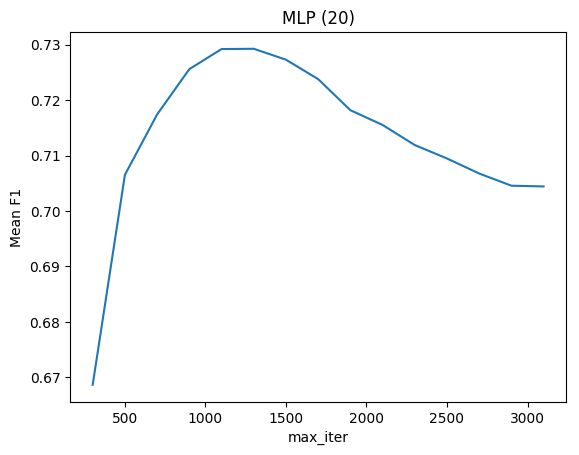

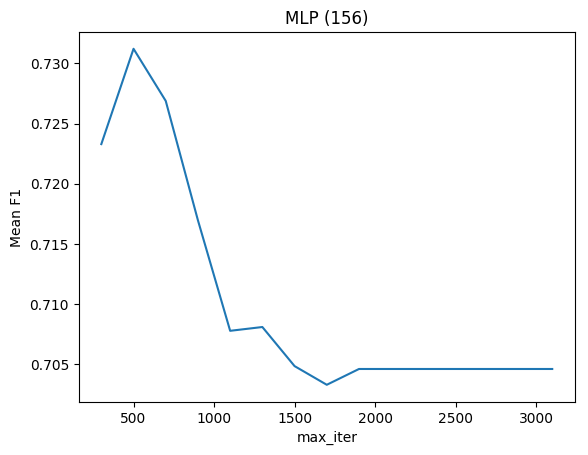

In [8]:
acd_.grid_search_acd(x_train, y_train)

Running SVM (linear)...
            C   Mean F1
0    1.000000  0.821306
1    1.473684  0.819288
2    1.947368  0.817455
3    2.421053  0.814407
4    2.894737  0.813850
5    3.368421  0.809162
6    3.842105  0.807209
7    4.315789  0.804184
8    4.789474  0.801193
9    5.263158  0.800806
10   5.736842  0.800539
11   6.210526  0.800234
12   6.684211  0.798256
13   7.157895  0.795554
14   7.631579  0.794802
15   8.105263  0.795459
16   8.578947  0.794478
17   9.052632  0.792978
18   9.526316  0.793736
19  10.000000  0.791592
Running SVM (rbf)...
            C   Mean F1
0    1.000000  0.805360
1    1.473684  0.805974
2    1.947368  0.806516
3    2.421053  0.808265
4    2.894737  0.809488
5    3.368421  0.810736
6    3.842105  0.810933
7    4.315789  0.811321
8    4.789474  0.811867
9    5.263158  0.812363
10   5.736842  0.814294
11   6.210526  0.815362
12   6.684211  0.813562
13   7.157895  0.816408
14   7.631579  0.816845
15   8.105263  0.817052
16   8.578947  0.816735
17   9.052632  0.81

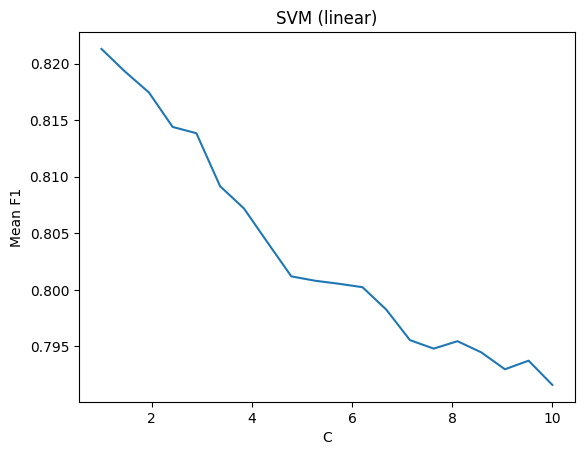

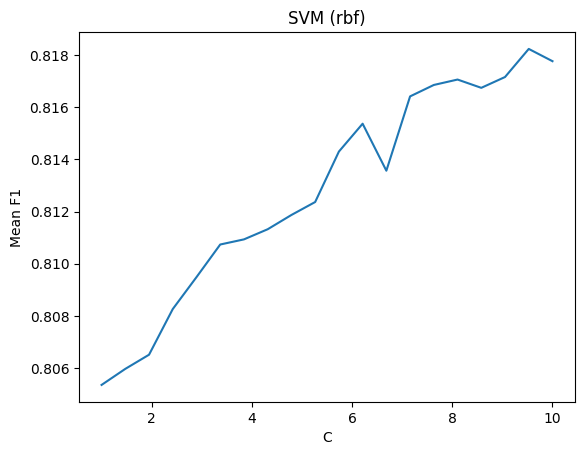

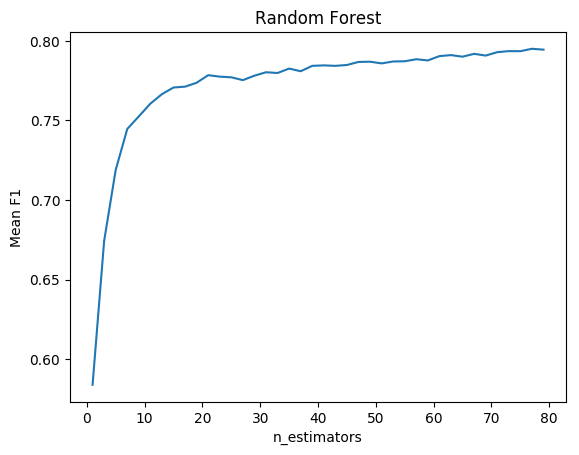

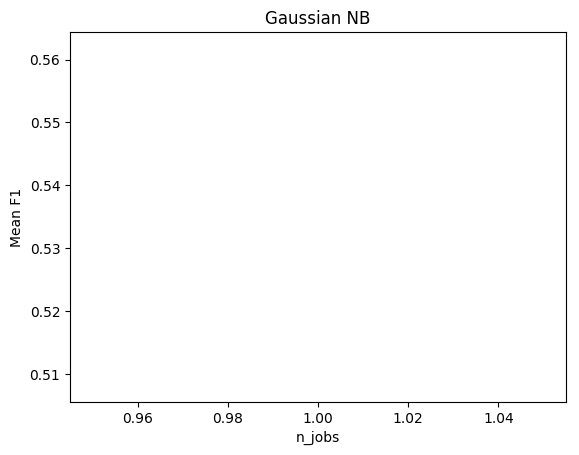

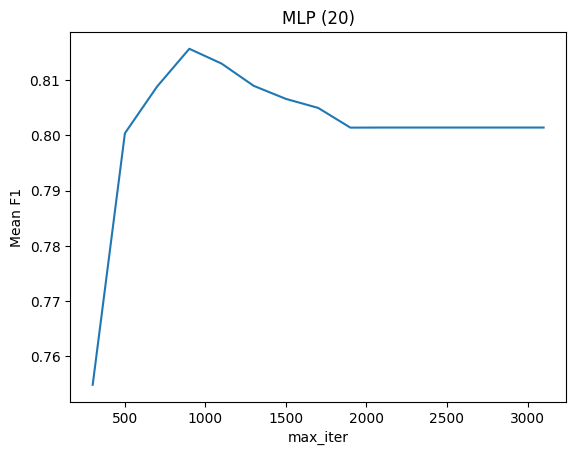

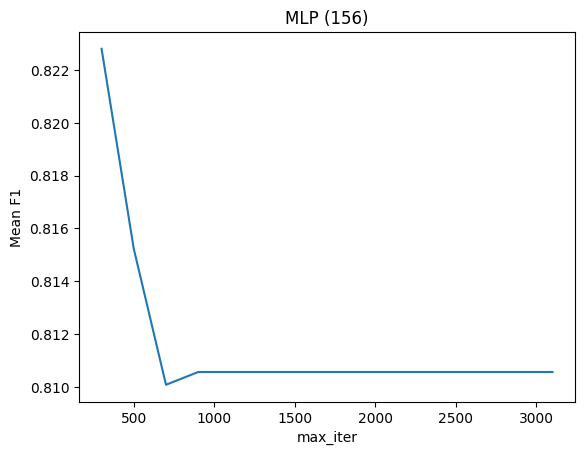

In [9]:
import numpy as np
merged_train = np.concatenate([x_train, x_train_hand], axis=1)

acd_.grid_search_acd(merged_train, y_train)